# Import transactions.csv

In [1]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('transactions.csv')

# Afficher les premières lignes du DataFrame pour vérification
print(df)


       id_prod                        date session_id client_id
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
...        ...                         ...        ...       ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714

[337016 rows x 4 columns]


# Import costomers.csv

In [4]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('customers.csv')

# Afficher les premières lignes du DataFrame pour vérification
print(df)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


# Import products.csv

In [5]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('products.csv')

# Afficher les premières lignes du DataFrame pour vérification
print(df)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


# Fusion des fichiers csv

In [6]:
import pandas as pd

# Charger les fichiers CSV dans des DataFrames distincts
products_df = pd.read_csv('products.csv')
customers_df = pd.read_csv('customers.csv')
transactions_df = pd.read_csv('transactions.csv')

# Fusionner les DataFrames
merged_df = pd.merge(transactions_df, products_df, on='id_prod', how='inner')
merged_df = pd.merge(merged_df, customers_df, on='client_id', how='inner')

# Vérifier la fusion
print(merged_df.head())

# Enregistrer le DataFrame fusionné dans un fichier CSV
merged_df.to_csv('fusion2.csv', index=False)


  id_prod                        date session_id client_id  price  categ sex  \
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   f   
1  0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   f   
2  0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   f   
3  0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   f   
4  0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   f   

   birth  
0   1977  
1   1977  
2   1977  
3   1977  
4   1977  


# Extraction des personnes n'ayant pas passé de commande

In [60]:
import pandas as pd

transactions_df = pd.read_csv('transactions.csv')
products_df = pd.read_csv('products.csv')
customers_df = pd.read_csv('customers.csv')

personnes_avec_commande = set(df_merged['client_id'])

toutes_les_personnes = set(customers_df['client_id'])

personnes_sans_commande = toutes_les_personnes - personnes_avec_commande

print("Personnes n'ayant pas passé de commande :", personnes_sans_commande)

Personnes n'ayant pas passé de commande : {'c_6735', 'c_8381', 'c_6930', 'c_90', 'c_5245', 'c_5223', 'c_7584', 'c_8253', 'c_4406', 'c_1223', 'c_862', 'c_4447', 'c_3789', 'c_587', 'c_6862', 'c_3017', 'c_2706', 'c_4086', 'c_3443', 'c_4358', 'c_3526'}


In [ ]:
import pandas as pd

personnes_sans_commande = ['c_6735', 'c_8381', 'c_6930', 'c_90', 'c_5245', 'c_5223', 'c_7584', 'c_8253', 'c_4406', 'c_1223', 'c_862', 'c_4447', 'c_3789', 'c_587', 'c_6862', 'c_3017', 'c_2706', 'c_4086', 'c_3443', 'c_4358', 'c_3526']

df_personnes_sans_commande = pd.DataFrame(personnes_sans_commande, columns=['Client'])

chemin_fichier = 'personnes_sans_commande.csv'

df_personnes_sans_commande.to_csv(chemin_fichier, index=False)

print("Les personnes n'ayant pas passé de commande ont été exportées vers", chemin_fichier)


# Extraction Produits qui ne se sont pas vendus

In [43]:
import pandas as pd

transactions_df = pd.read_csv('transactions.csv')
products_df = pd.read_csv('products.csv')
customers_df = pd.read_csv('customers.csv')

tous_les_produits = set(products_df['id_prod'])

produits_vendus = set(transactions_df['id_prod'])

produits_non_vendus = tous_les_produits - produits_vendus

print("Produits qui ne se sont pas vendus :", produits_non_vendus)


Produits qui ne se sont pas vendus : {'0_1014', '0_1119', '0_1025', '0_299', '0_310', '2_72', '1_0', '2_87', '2_86', '0_2308', '0_525', '0_1645', '1_394', '0_1624', '0_510', '0_1620', '0_1318', '0_1780', '0_1800', '0_1016', '0_322', '0_1062'}


In [61]:
import pandas as pd

produits_non_vendus1 = ['0_1014', '0_1119', '0_1025', '0_299', '0_310', '2_72', '1_0', '2_87', 
    '2_86', '0_2308', '0_525', '0_1645', '1_394', '0_1624', '0_510', '0_1620', 
    '0_1318', '0_1780', '0_1800', '0_1016', '0_322', '0_1062']

df_produits_non_vendus1 = pd.DataFrame(produits_non_vendus1, columns=['Produit'])

chemin_fichier = 'produits_non_vendus1.csv'

df_produits_non_vendus1.to_csv(chemin_fichier, index=False)

print("Les produits non vendus ont été exportés vers", chemin_fichier)


Les produits non vendus ont été exportés vers produits_non_vendus1.csv


In [47]:
prod_trans_ids = transactions_df['id_prod'].unique()
unsold_prod = products_df[~products_df['id_prod'].isin(prod_trans_ids)]
cust_trans_ids = transactions_df['client_id'].unique()
inactive_cust = customers_df[~customers_df['client_id'].isin(cust_trans_ids)]
products = products_df[products_df['id_prod'].isin(prod_trans_ids)]
customers = customers_df[customers_df['client_id'].isin(cust_trans_ids)]

# Taux de conversion

In [14]:
import pandas as pd

fusion_df = pd.read_csv('fusion2.csv')

nombre_total_clients = fusion_df['client_id'].nunique()

clients_ayant_commande = fusion_df[fusion_df['price'] > 0]['client_id'].nunique()

taux_conversion = (clients_ayant_commande / nombre_total_clients) * 100

print("Taux de conversion : {:.2f}%".format(taux_conversion))



Taux de conversion : 99.98%


# Distribution années de naissance et des genres

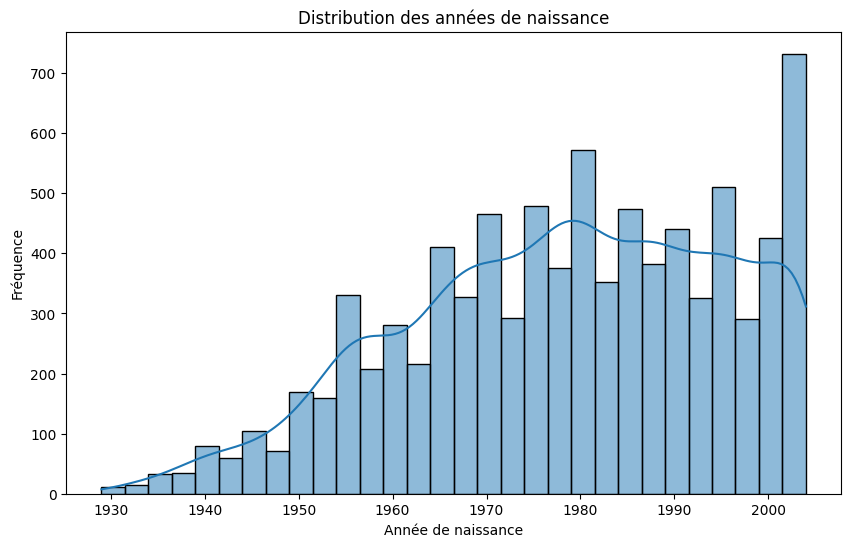

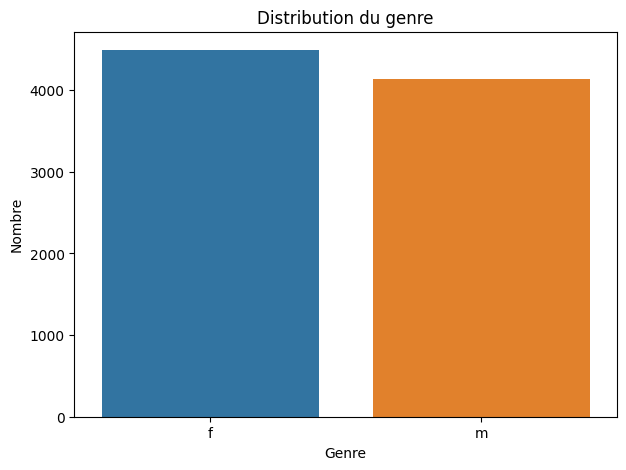

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(customers_df['birth'], bins=30, kde=True)
plt.title('Distribution des années de naissance')
plt.xlabel('Année de naissance')
plt.ylabel('Fréquence')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x='sex', data=customers_df)
plt.title('Distribution du genre')
plt.xlabel('Genre')
plt.ylabel('Nombre')
plt.show()


# 1. la corrélation entre le genre d’un client et les catégories des livres achetés

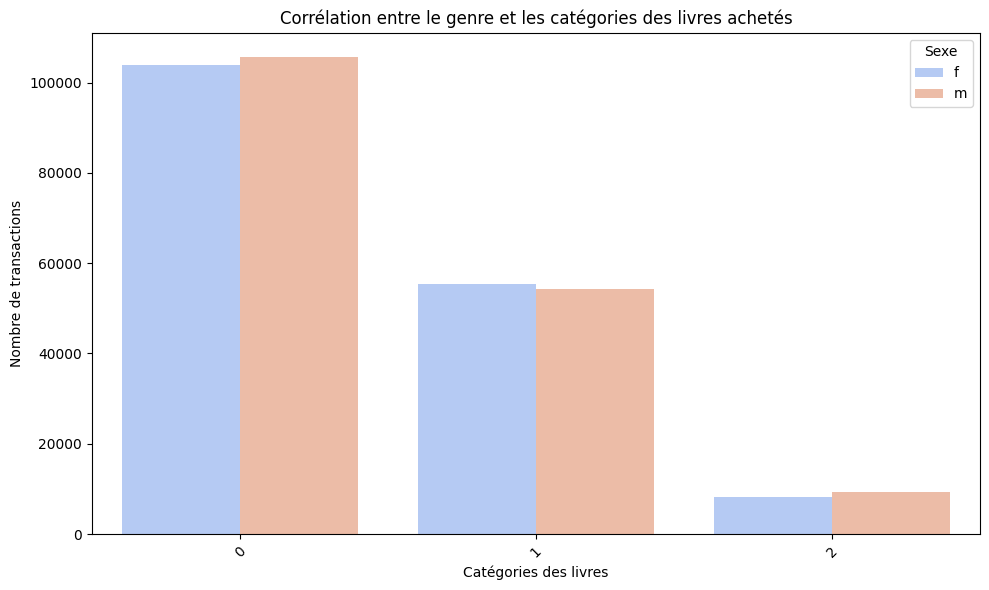

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_merged = pd.read_csv('fusion2.csv')

contingency_table = pd.crosstab(df_merged['sex'], df_merged['categ'])

plot_data = contingency_table.reset_index().melt(id_vars='sex', var_name='category', value_name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='category', y='count', hue='sex', palette='coolwarm')
plt.title('Corrélation entre le genre et les catégories des livres achetés')
plt.xlabel('Catégories des livres')
plt.ylabel('Nombre de transactions')
plt.legend(title='Sexe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. coefficient de corrélation de Pearson et la p-value

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_merged['sex'], df_merged['categ'])

print("Table de contingence entre le genre et les catégories :\n", contingency_table)

correlation_coefficient, p_value, _, _ = chi2_contingency(contingency_table)
print("\nCoefficient de corrélation de Pearson :", correlation_coefficient)
print("p-value :", p_value)


Table de contingence entre le genre et les catégories :
 categ       0      1     2
sex                       
f      103892  55469  8260
m      105734  54266  9292

Coefficient de corrélation de Pearson : 81.76651815242087
p-value : 1.756411132058017e-18


# 1. test ANOVA

In [ ]:
Dans cet exemple, nous divisons les données en deux groupes basés sur le genre 
('f' pour les femmes et 'm' pour les hommes), puis nous utilisons la fonction 
'f_oneway' pour effectuer le test ANOVA. La statistique F et la p-value associée
sont imprimées pour évaluer si les moyennes des catégories de livres achetés
diffèrent significativement entre les deux groupes de genre.

In [6]:
from scipy.stats import f_oneway

group_f = df_merged[df_merged['sex'] == 'f']['categ']
group_m = df_merged[df_merged['sex'] == 'm']['categ']

f_statistic, p_value = f_oneway(group_f, group_m)

print("Statistique F :", f_statistic)
print("p-value :", p_value)


Statistique F : 0.17289399041888573
p-value : 0.6775527953018707


# Dataframe

In [57]:
df_merged

,id_prod,date,session_id,client_id,price,categ,sex,birth,nb-com
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977,44
...,...,...,...,...,...,...,...,...,...
336908,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1,f,1967,1
336909,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1,m,1933,2
336910,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0,m,1933,2
336911,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0,f,1970,1
